In [2]:
import scipy.io
import numpy
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression

# Lineplots first!

In [3]:
def lineplots(data, block, first, last):
    traj = scipy.io.loadmat('data/pilot/pilot_{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))

    for i in range(first,last):
        plt.plot(traj['x'][0][i][0], traj['y'][0][i][0])


In [4]:
interact(lineplots, data = widgets.ToggleButtons(options = [1, 2, 3]), block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1),
        first = widgets.IntSlider(max = 63, min = 0, value = 0, step = 1), last = widgets.IntSlider(max = 64, min = 1, value = 1, step = 1))

interactive(children=(ToggleButtons(description='data', options=(1, 2, 3), value=1), IntSlider(value=0, descri…

<function __main__.lineplots(data, block, first, last)>

## Error Vs Time plots

Divide Trajectories by 5. Calculate mean and standard deviation of difference between ideal and actual trajectories (both divided by 5) for all 64 trajectories in a block. 
From the movement time, calculate how long it took to finish each of these 5 trajectories. Calculate mean and standard deviation across 64 trials. 

This might as well just be equal to the mean and standard deviation of the **number** of points in each of those five quantiles for all trajectories.



# Error Calculation
Takes in a trajectory loaded from the mat file and calculates error by comparing minimum distance from x and y coordinates of the actual trajectory to the ideal trajectory

In [10]:
#square_coord = scipy.io.loadmat('data/pilot/pilot_1/squares/coordinates/squares3.mat')
#traj = scipy.io.loadmat('data/pilot/pilot_1/actual_trajectories/trajectories3.mat')
#def calc_error(traj, square_coord):
# The version above uses square coordinates
def calc_error(traj):    
    error = list()
    for j in range(64):
        traj_dist = list()
        trajx, trajy = traj['x'][0][j][0], traj['y'][0][j][0]
        #end_pointx, end_pointy  = square_coord['squareX'][0][j], square_coord['squareY'][0][j]
        end_pointx, end_pointy  = traj['x'][0][j][0][-1], traj['y'][0][j][0][-1]

        xline = numpy.linspace(0, end_pointx, 500)
        yline = numpy.linspace(0, end_pointy, 500)

        for i in range(len(trajx)):
            xdist = min(numpy.absolute(xline-trajx[i]))
            ydist = min(numpy.absolute(yline-trajy[i]))
            dist = numpy.sqrt(xdist**2 + ydist**2)
            traj_dist.append(dist)
        error.append(traj_dist)
    return error
#dist = numpy.linalg.norm(numpy.cross(p2-p1, p1-p3))/numpy.linalg.norm(p2-p1)

In [4]:
#traj['x'][0][0][0][-1]

In [ ]:
#calc_error(traj, square_coord)

Participant 1 Gradual Change Accuracy emphasis

Participant 2 Sudden change Accuracy emphasis

Participant 3 Gradual change Speed emphasis


In [5]:
def errorvstime(data, block):
    traj = scipy.io.loadmat('data/pilot/pilot_{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/pilot/pilot_{data}/ideal_trajectories/ideal_trajectories{block}.mat'.format(block = str(block), data=str(data)))
    squares = scipy.io.loadmat('data/pilot/pilot_{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = calc_error(traj)
    #error = xdiff**2+ydiff**2
    #print (error)
    error_means = numpy.zeros((64, 5))
    for i in range(64):
        n = len(error[i])
        for j in range(5):
            error_means[i, j] = numpy.mean(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
        #error_means[i, ] = error_means[i, ]/max(error_means[i,])

    
    time_means = numpy.zeros((64, 5))

    for i in range(64):
        n = len(error[i])
        for j in range(5):
            time_means[i, j] = len(error[i][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
    times = numpy.cumsum(numpy.mean(time_means, axis = 0))
    plt.errorbar(times, numpy.mean(error_means, axis = 0), xerr = numpy.std(time_means, axis = 0), yerr = numpy.std(error_means, axis = 0))
    plt.ylabel('Error')
    plt.xlabel('Time')
    plt.xlim(0, 100)
    plt.ylim(-20, 70)

In [ ]:
interact(errorvstime, data = widgets.ToggleButtons(options = [1, 2, 3]), 
                      block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1))

In [ ]:
def get_qdata(data):
    mtq = numpy.quantile(data['mt'], numpy.array([0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]))

    rmspoints = list()
    mtpoints = list()
    for i in range(len(mtq)):
        rmspoints.append(data['rmse'][numpy.where(data['mt']<mtq[i])[0], numpy.where(data['mt']<mtq[i])[1]])
        mtpoints.append(data['mt'][numpy.where(data['mt']<mtq[i])[0], numpy.where(data['mt']<mtq[i])[1]])
    return rmspoints, mtpoints

In [ ]:
def qplots(data, qno):
    rmspoints, mtpoints = get_qdata(data)
    plt.hist2d(rmspoints[qno], mtpoints[qno])
    

In [ ]:
qplots(mat, 5)

In [ ]:
interact(qplots, data = widgets.ToggleButtons(options = [mat, mat2, mat3]), qno = widgets.IntSlider(max = 6, min = 0, value = 0, step = 1))

In [ ]:
def ztrans(data):
    mt = data['mt']
    rmse = data['rmse']
    for i in range(10):
        mt[i] = (mt[i] - numpy.mean(mt[i]))/numpy.std(mt[i])
        rmse[i] = (rmse[i] - numpy.mean(rmse[i]))/numpy.std(rmse[i])
    return (mt, rmse)

In [ ]:
def block_plot(block, data):

    mt, rmse = ztrans(data)
    plt.hist2d(mt[block], rmse[block], bins = 10)
    return

In [ ]:
interact(block_plot, block = widgets.IntSlider(min=0,max=9,step=1,value=0), data = widgets.ToggleButtons(options = [mat, mat2, mat3]))

In [ ]:
def errorplots(data, block):
    traj = scipy.io.loadmat('data/pilot/pilot_{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/pilot/pilot_{data}/ideal_trajectories/ideal_trajectories{block}.mat'.format(block = str(block), data=str(data)))
    xdiff = (ideal_traj['idealXs'] - traj['x'])
    ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = xdiff**2+ydiff**2


In [ ]:
errorplots(1, 1)

In [ ]:
def errorvstime2(data, block):
    traj = scipy.io.loadmat('data/pilot/pilot_{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/pilot/pilot_{data}/ideal_trajectories/ideal_trajectories{block}.mat'.format(block = str(block), data=str(data)))

    xdiff = (ideal_traj['idealXs'] - traj['x'])
    ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = xdiff**2+ydiff**2

    error_means = numpy.zeros((64, 5))
    for i in range(64):
        n = len(error[0][i][0])
        for j in range(5):
            error_means[i, j] = numpy.mean(error[0][i][0][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
        error_means[i, ] = error_means[i, ]


    time_means = numpy.zeros((64, 5))
    for i in range(64):
        n = len(error[0][i][0])
        for j in range(5):
            time_means[i, j] = len(error[0][i][0][int(numpy.floor((j)*n/5)):int(numpy.floor((j+1)*n/5))])
    times = numpy.cumsum(numpy.mean(time_means, axis = 0))
    plt.errorbar(times, numpy.mean(error_means, axis = 0), xerr = numpy.std(time_means, axis = 0), yerr = numpy.std(error_means, axis = 0))


In [ ]:
interact(errorvstime2, data = widgets.ToggleButtons(options = [1, 2, 3]), block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1))

In [ ]:
def wald_fit(block, data):
    means = list()
    scales = list()
    initial_times = scipy.io.loadmat('data/pilot/pilot_{data}/initial_time/initial_time{block}.mat'.format(data = data, block = block))
    initial_times = initial_times['initial_time']
    mean, scale = stat.wald.fit(initial_times)
    #mean, sigma, tau = stat.exponnorm(initial_times)
    if mean <= 0:
        mean = 0.0000001
    plt.hist(numpy.random.wald(mean, scale, size=10000))

In [ ]:
interact(wald_fit, data = widgets.ToggleButtons(options = [1, 2, 3]), block = widgets.IntSlider(max = 11, min = 0, value = 0, step = 1))

Likelihood of the data

In [ ]:
def mle_waldfit(data, block):
    #best_location = 0.0001
    #best_scale = 0
    #ter = 0
    initial_times = scipy.io.loadmat('data/pilot/pilot_{data}/initial_time/initial_time{block}.mat'.format(data = data, block = block))
    initial_times = initial_times['initial_time']

    ll_old = float('-inf')
    for non_dec_time in numpy.arange(0.001, 0.2, 0.001):
        loc, scale = stat.wald.fit(initial_times)
        #print (loc)
        ll_new = numpy.product(stat.wald.pdf(initial_times - non_dec_time, loc, scale))
        if ll_new > ll_old:
            #print ('here')
            ll_old = ll_new
            best_location = loc
            best_scale = scale
            ter = non_dec_time
    return ll_old, best_location, best_scale, ter

In [ ]:
ll = numpy.zeros((3, 12))
loc = numpy.zeros((3, 12))
scale = numpy.zeros((3, 12))
ter = numpy.zeros((3, 12))
for data in range(3):
    for block in range(12):
        ll[data, block], loc[data, block], scale[data, block], ter[data, block] = mle_waldfit(data+1, block)
        #print (data, block)

In [3]:
initial_times = list()
for i in range(12):
    initial_times_load = scipy.io.loadmat('data/pilot/pilot_{data}/initial_time/initial_time{block}.mat'.format(data = 1, block = i))
    initial_times.append(numpy.concatenate(initial_times_load['initial_time']).tolist())
initial_times = numpy.ravel(numpy.array(initial_times))

In [ ]:
numpy.exp(1)

In [31]:
def wald_logdensity(params):
    #print (params)
    drift, boundary = params
    
    exp = -(boundary - drift*initial_times)/(2*initial_times)
    base = boundary/numpy.sqrt(2*numpy.pi*(initial_times**3))
    density = base*numpy.exp(exp)
   
    return sum(-numpy.log(density))

In [ ]:
ll = sum(numpy.log(wald_density(initial_times, 0.01, 0.1)))

In [ ]:
ll_array = numpy.zeros((3, 1))
boundary_array = numpy.zeros((3, 1))
drift_array = numpy.zeros((3, 1))
ter_array = numpy.zeros((3, 1))
ll_old = float('-inf')
count = 0
for data in range(3):
    initial_times = list()
    for i in range(12):
        initial_times_load = scipy.io.loadmat('data/pilot/pilot_{data}/initial_time/initial_time{block}.mat'.format(data = 1, block = i))
        initial_times.append(numpy.concatenate(initial_times_load['initial_time']).tolist())
    initial_times = numpy.ravel(numpy.array(initial_times))
    for drift in numpy.arange(0.1, 1, 0.001):
        for boundary in numpy.arange(0.1, 1, 0.001):
            for ter in numpy.arange(0.08, 0.15, 0.001):
                ll_new = sum(numpy.log(wald_density(initial_times - ter, drift, boundary)))
                if ll_new > ll_old:
                    ll_old = ll_new
                    best_drift = drift
                    best_boundary = boundary
                    best_ter = ter
    count = count + 1
    ll_array[data,1] = ll_old
    drift_array[data,1] = best_drift
    boundary_array[data,1] = best_boundary
    ter_array[data,1] = best_ter
    print (count)

In [9]:
from scipy import optimize

In [37]:
initial_times = scipy.io.loadmat('data/pilot/pilot_{data}/initial_time/initial_time{block}.mat'.format(data = 1, block = 3))
initial_times = initial_times['initial_time']
optimize.minimize(wald_logdensity, (0.0001, 0.0001), method='nelder-mead', options={"maxiter":500})

C:\Users\Tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys
C:\Users\Tejas\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\Tejas\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 final_simplex: (array([[2167.2996171,  499.4002949],
       [2167.2996171,  499.4002949],
       [2167.2996171,  499.4002949]]), array([-inf, -inf, -inf]))
           fun: -inf
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 1846
           nit: 500
        status: 2
       success: False
             x: array([2167.2996171,  499.4002949])

Boundary is how good my plan is. Boundary affected by speed/accuracy.

Drift rate affected by gradual vs sudden.

In [11]:
def errors(data, block):
    traj = scipy.io.loadmat('data/pilot/pilot_{data}/actual_trajectories/trajectories{block}.mat'.format(block=str(block), data=str(data)))
    ideal_traj = scipy.io.loadmat('data/pilot/pilot_{data}/ideal_trajectories/ideal_trajectories{block}.mat'.format(block = str(block), data=str(data)))
    squares = scipy.io.loadmat('data/pilot/pilot_{data}/squares/coordinates/squares{block}.mat'.format(block=str(block), data=str(data)))
    #xdiff = (ideal_traj['idealXs'] - traj['x'])
    #ydiff = (ideal_traj['idealYs'] - traj['y'])
    error = calc_error(traj)
    return error

In [61]:
error_sum1 = list()
error_std1 = list()
error_sum2 = list()
error_std2 = list()
error_sum3 = list()
error_std3 = list()

for block in range(12):
    error_sum1.append(numpy.mean(numpy.sum(errors(1, block), axis=0)))
    error_std1.append(numpy.std(numpy.sum(errors(1, block), axis=0)))
    error_sum2.append(numpy.mean(numpy.sum(errors(2, block), axis=0)))
    error_std2.append(numpy.std(numpy.sum(errors(2, block), axis=0)))
    error_sum3.append(numpy.mean(numpy.sum(errors(3, block), axis=0)))
    error_std3.append(numpy.std(numpy.sum(errors(3, block), axis=0)))
    

Text(0.5, 0, 'Blocks')

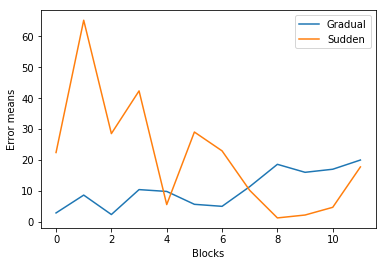

In [92]:
plot1, = plt.plot(numpy.power(numpy.array(error_sum1), 1))
plot2, = plt.plot(numpy.power(numpy.array(error_sum2), 1))
#plt.plot(error_sum3)
plt.legend((plot1, plot2), ('Gradual', 'Sudden'))

plt.ylabel('Error means')
plt.xlabel('Blocks')
#plt.legend('G')

In [74]:
numpy.power(4, 1)

4

In [67]:
all_errors[1]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.17496153917549034,
 0.07973933000514496,
 0.1505070472281239,
 0.157887956503478,
 0.157887956503478,
 0.17087501012054263,
 0.08590449716984082,
 0.2047183363132077,
 0.21059526209003196,
 0.10962504294366619,
 0.17839817898223276,
 0.15918940593582245,
 0.15918940593582245,
 0.15918940593582245,
 0.15918940593582245,
 0.15918940593582245,
 0.15918940593582245,
 0.07380137011062603,
 0.1931219504953112,
 0.14881674586569646,
 0.037269999014141804,
 0.12504886907653684,
 0.13229181518375627,
 0.11080833175282702,
 0.0]

In [18]:
lm = LinearRegression()
lm.fit(numpy.transpose([range(12)]), error_sum)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lm.predict(11)


array([36.0354097])

In [22]:
error_sum[11]

41.718527212783144

In [47]:
trial_errors = list()
for i in range(12):
    block_error = errors(1, i)
    for j in range(64):
        trial_errors.append(numpy.mean(block_error[j]))

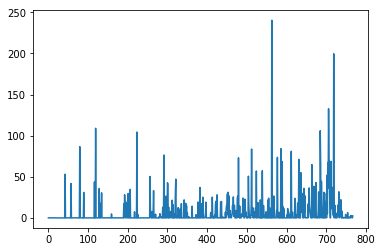

In [48]:
plt.plot(trial_errors)

In [49]:
trial_errors = list()
for i in range(12):
    block_error = errors(2, i)
    for j in range(64):
        trial_errors.append(numpy.mean(block_error[j]))

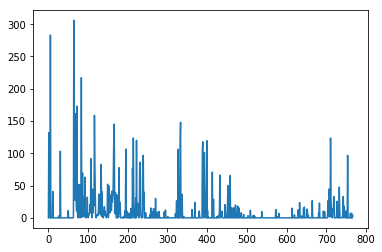

In [57]:
ax = plt.axes()
ax.plot(trial_errors)